# K Nearest Neighbors with Python
You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('KNN_Project_Data')

In [3]:
dataset.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

## Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()

In [6]:
scaler.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_fature=scaler.transform(dataset.drop('TARGET CLASS',axis=1))

In [8]:
scaled_fature

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [9]:
x=pd.DataFrame(scaled_fature,columns=dataset.columns[:-1])
x.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [10]:
y=dataset['TARGET CLASS']

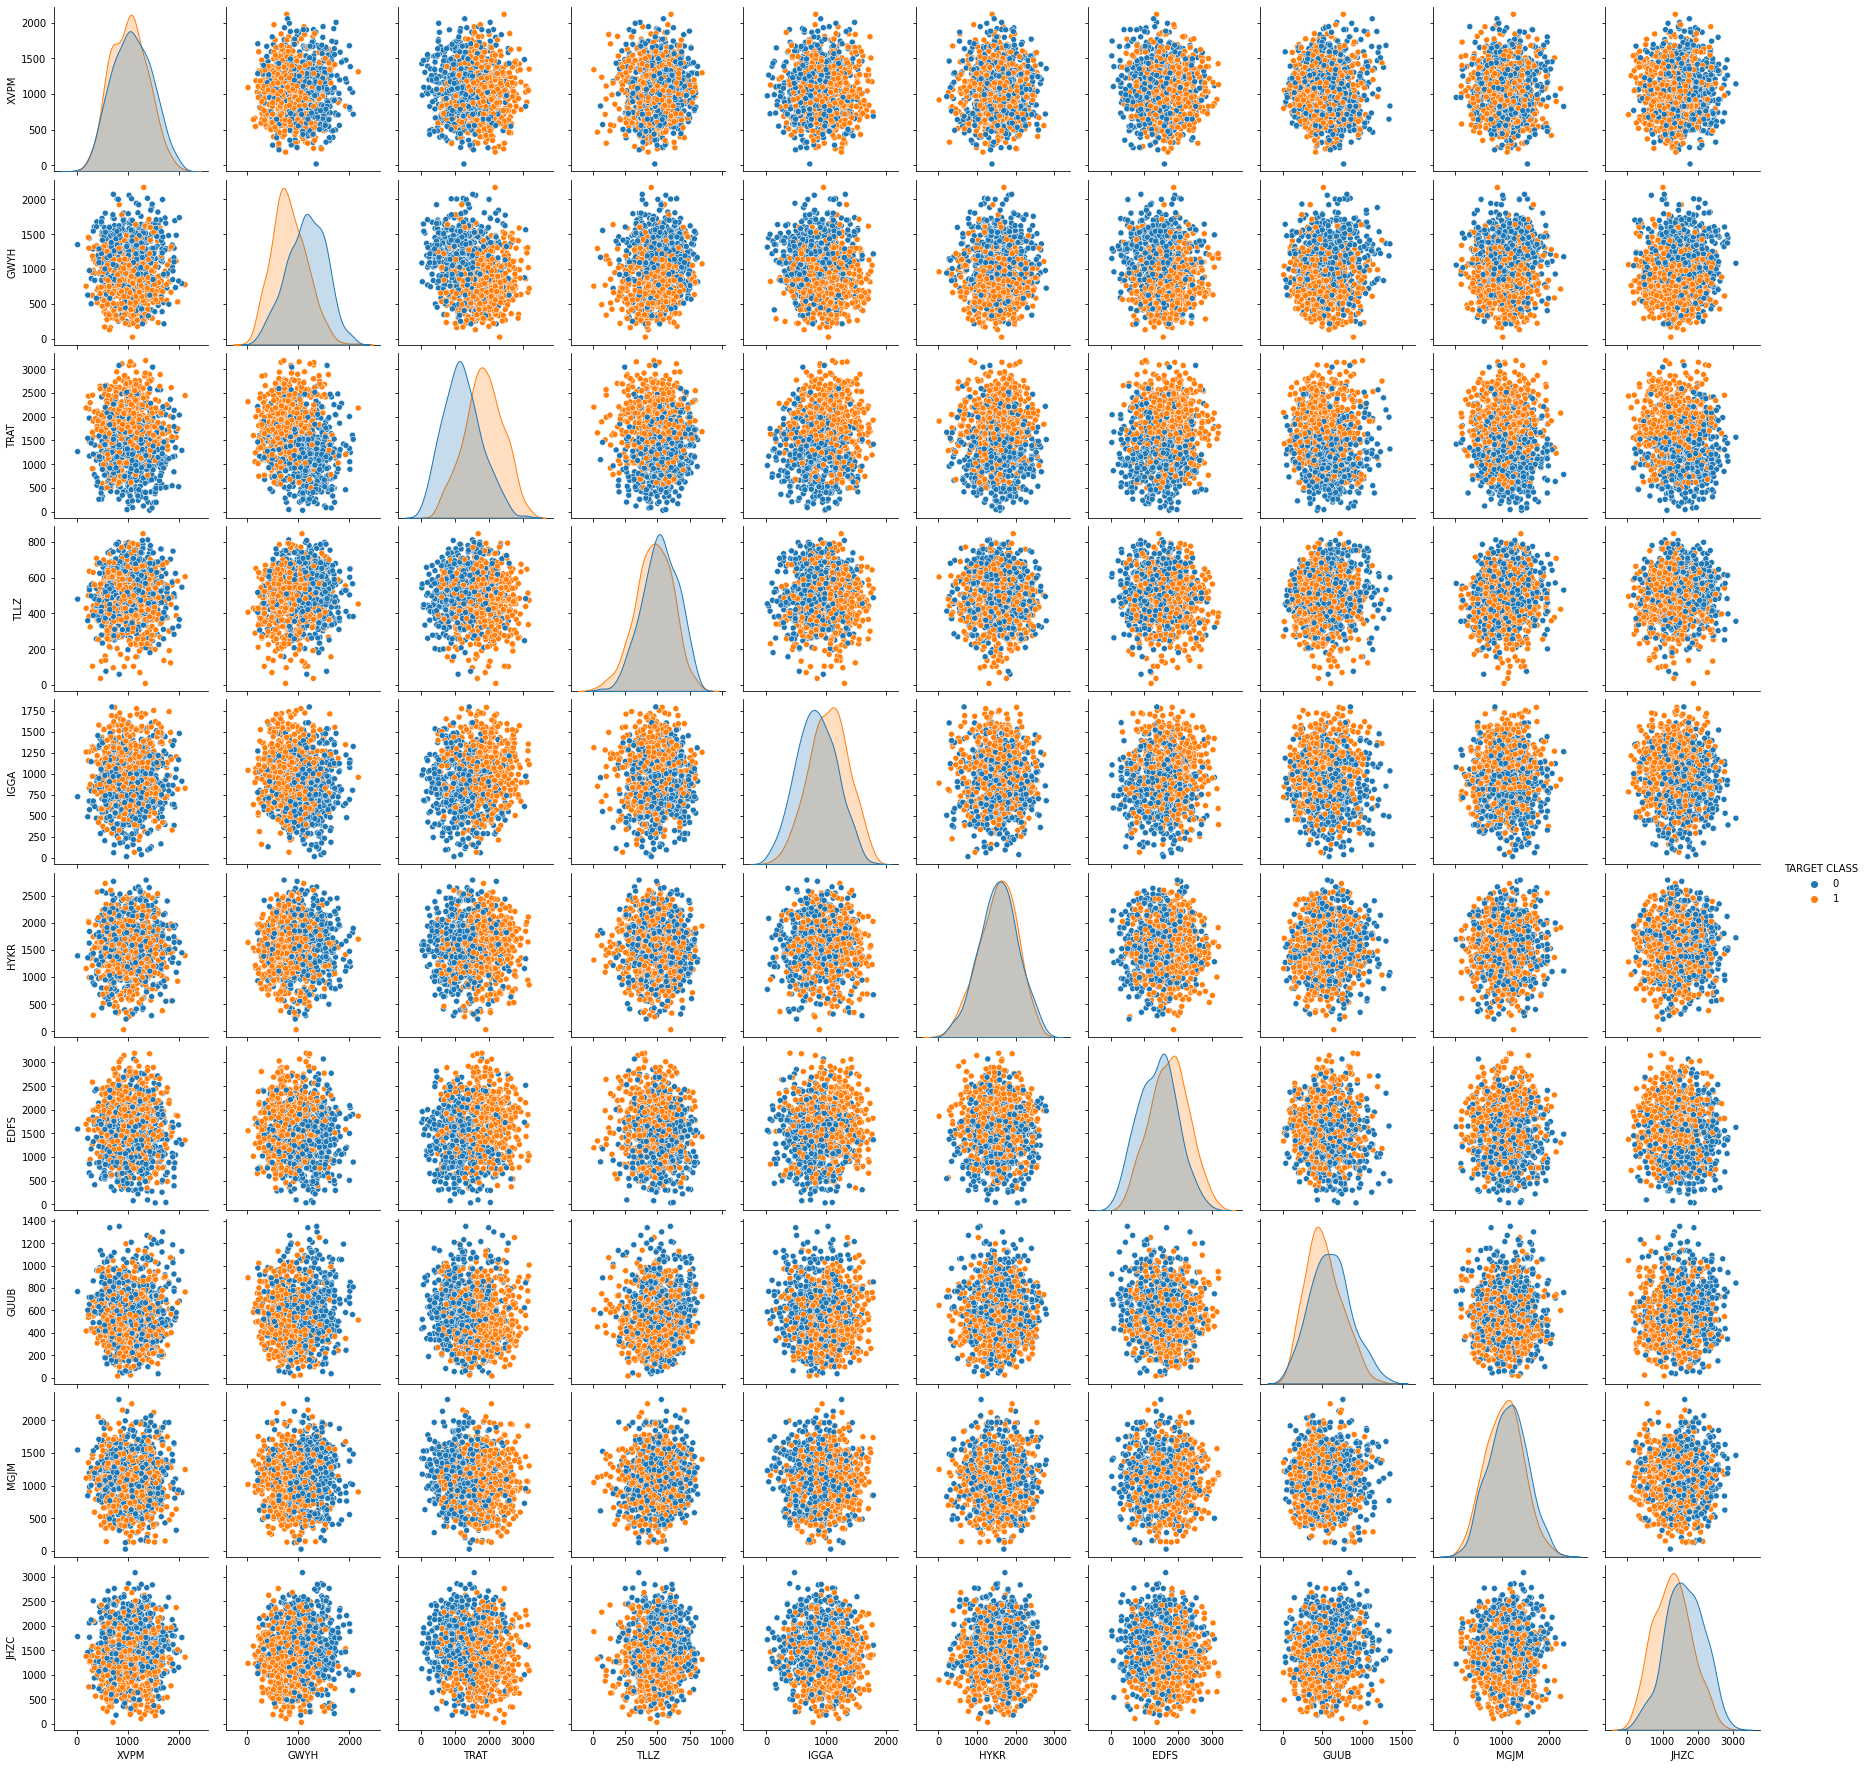

In [11]:
sns.pairplot(dataset,hue='TARGET CLASS')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [15]:
print(confusion_matrix(y_test,pred))

[[114  45]
 [ 31 110]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       159
           1       0.71      0.78      0.74       141

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [17]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

In [18]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    error_rate.append(1-score.mean())

In [19]:
error_rate2=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    score=np.mean(pred_i != y_test)
    error_rate2.append(score)

Text(0, 0.5, 'accuracy Rate')

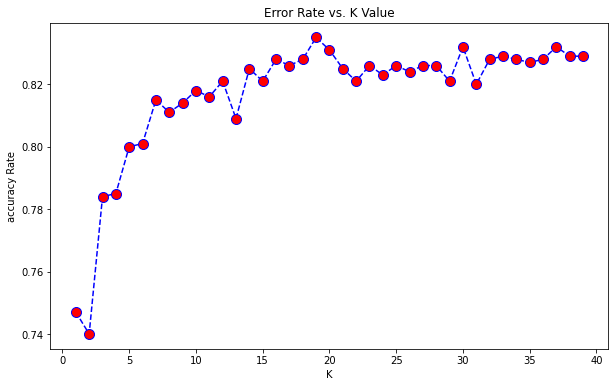

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy Rate')

In [21]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[114  45]
 [ 31 110]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       159
           1       0.71      0.78      0.74       141

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [42]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('knn auc score', roc_auc_score(y_test,pred))
knn_pred=knn.predict_proba(x_test)

[[118  41]
 [ 24 117]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       159
           1       0.74      0.83      0.78       141

    accuracy                           0.78       300
   macro avg       0.79      0.79      0.78       300
weighted avg       0.79      0.78      0.78       300

knn auc score 0.7859627994112137


# random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [25]:
rfc_model=rfc.fit(x_train,y_train)

In [43]:
pred_rfc=rfc_model.predict(x_test)
rf_pred=rfc_model.predict_proba(x_test)

In [28]:
pred_rfc

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0], d

In [29]:
from sklearn.metrics import roc_auc_score,roc_curve

In [30]:
print('random forest predicted auc score: ',roc_auc_score(y_test,pred_rfc))

random forest predicted auc score:  0.7898434363709355


# logistic regration

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [32]:
lr_model=lr.fit(x_train,y_train)

In [44]:
pred_lr=lr_model.predict(x_test)
lr_pred=lr_model.predict_proba(x_test)

In [34]:
pred_lr

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0], d

In [35]:
print('logistic regration auc score: ',roc_auc_score(y_test,pred_lr))

logistic regration auc score:  0.8012846246487354


# Adaboost Classifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()

In [37]:
ab_model=ab.fit(x,y)

In [45]:
pred_ab=ab_model.predict(x_test)
ab_pred=ab_model.predict_proba(x_test)

In [39]:
pred_ab

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0], d

In [40]:
print('adaboost classifier accuracy by auc score: ',roc_auc_score(y_test,pred_ab))

adaboost classifier accuracy by auc score:  0.8532048708684599


# No we will focus on selecting the best threshold for maximum accuracy

In [53]:
pred=[]

for model in [knn,rfc_model,lr_model,ab_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))

final_prediction= pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8733217360274768


In [52]:
final_prediction

0      0.814938
1      0.669415
2      0.567689
3      0.846047
4      0.841618
         ...   
295    0.700660
296    0.838708
297    0.638272
298    0.259986
299    0.384040
Length: 300, dtype: float64

In [54]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.881912  , 0.881912  , 0.86535394, 0.86392452, 0.83833698,
       0.83780784, 0.80287915, 0.80227667, 0.80136655, 0.79875276,
       0.7423541 , 0.73338683, 0.71283583, 0.70893111, 0.7006596 ,
       0.69850777, 0.69516533, 0.69459838, 0.68228887, 0.67181617,
       0.66921963, 0.66469236, 0.64817635, 0.64596251, 0.64297681,
       0.64284336, 0.63558186, 0.62525506, 0.59654873, 0.59443199,
       0.59413952, 0.59029666, 0.57921946, 0.57669099, 0.56935722,
       0.56829398, 0.56768893, 0.56519186, 0.56458654, 0.5551757 ,
       0.54785866, 0.53072421, 0.52118869, 0.51815842, 0.51127437,
       0.50967801, 0.50737326, 0.50619524, 0.50590286, 0.49991665,
       0.49366613, 0.4792911 , 0.47362644, 0.46210466, 0.45531854,
       0.45121943, 0.44703241, 0.4423651 , 0.44114782, 0.42564393,
       0.42121046, 0.41829628, 0.41756965, 0.40780663, 0.40624678,
       0.38279512, 0.38239023, 0.38236268, 0.37368468, 0.37347041,
       0.37082869, 0.36701448, 0.36642228, 0.33178171, 0.33045

In [55]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

thresholds  accuracy
33    0.576691  0.810000
35    0.568294  0.810000
37    0.565192  0.810000
32    0.579219  0.806667
34    0.569357  0.806667

In [56]:

accuracy_ls

thresholds  accuracy
33    0.576691  0.810000
35    0.568294  0.810000
37    0.565192  0.810000
32    0.579219  0.806667
34    0.569357  0.806667
..         ...       ...
1     0.881912  0.530000
88    0.150975  0.526667
89    0.146104  0.520000
90    0.144992  0.516667
91    0.089287  0.473333

[92 rows x 2 columns]

In [57]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

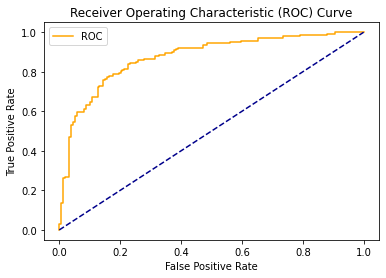

In [58]:
plot_roc_curve(fpr,tpr)

# Support Vector Machine (SVM)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [15]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
pred_svc_lin=svc.predict(x_test)
accuracy_score(y_test,pred_svc_lin)

0.7966666666666666

In [23]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)

SVC(kernel='poly')

In [24]:
pred_svc_poly=svc.predict(x_test)
accuracy_score(y_test,pred_svc_poly)

0.77

# gradient boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [26]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [32]:
pred_gb=gb.predict(x_test)


In [35]:
accuracy_score(y_test,pred_gb)

0.8033333333333333

In [37]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       159
           1       0.78      0.82      0.80       141

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



# XGBoosting

In [38]:
import xgboost

In [40]:
xgb=xgboost.XGBClassifier()

In [45]:
xgb.fit(x_train,y_train)

[14:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
pred_xgb=xgb.predict(x_test)

In [47]:
accuracy_score(y_test,pred_xgb)
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       159
           1       0.77      0.82      0.79       141

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



# Hyperparameter Optimization For Xgboost using RandomizedSearchCV

In [48]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

In [49]:
parms={
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

In [50]:
xgb_model=RandomizedSearchCV(xgb,param_distributions=parms,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [51]:
xgb_model.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [52]:
xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
xgb_model.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [55]:
new_model=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
new_model.fit(x_train,y_train)

[15:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
pred_new=new_model.predict(x_test)

In [58]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       159
           1       0.77      0.82      0.79       141

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [59]:
score=cross_val_score(new_model,x_train,y_train,cv=10)

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\revei\appdata\local\program

[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\revei\appdata\local\program

[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [60]:
score

array([0.87142857, 0.84285714, 0.81428571, 0.78571429, 0.77142857,
       0.81428571, 0.81428571, 0.82857143, 0.81428571, 0.78571429])

In [61]:
score.mean()

0.8142857142857143

# model Interpretor

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [14]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
import lime
from lime import lime_tabular
interpretor=lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),feature_names=x_train.columns,mode='classification')

In [17]:
x_test.iloc[4]

XVPM    0.967907
GWYH   -0.942198
TRAT    1.524246
TLLZ    0.658977
IGGA    1.303008
HYKR    0.106658
EDFS    1.189490
GUUB   -0.482553
MGJM   -0.231949
JHZC    0.218538
Name: 672, dtype: float64

In [22]:
expln=interpretor.explain_instance(data_row=x_test.iloc[5],predict_fn=rfc_model.predict_proba)
expln.show_in_notebook(show_table=True)

# Post pruning decision trees with cost complexity pruning

.. currentmodule:: sklearn.tree

The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

See also minimal_cost_complexity_pruning for details on pruning.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc=DecisionTreeClassifier(random_state=0)

In [15]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
pred_dtc=dtc.predict(x_test)
accuracy_score(y_test,pred_dtc)

0.7333333333333333

[Text(446.76728592519686, 524.1857142857143, 'X[2] <= 0.072\ngini = 0.5\nsamples = 700\nvalue = [341, 359]'),
 Text(191.88115157480317, 485.3571428571429, 'X[1] <= -0.654\ngini = 0.423\nsamples = 378\nvalue = [263, 115]'),
 Text(83.48031496062993, 446.52857142857147, 'X[4] <= -0.291\ngini = 0.442\nsamples = 82\nvalue = [27, 55]'),
 Text(43.93700787401575, 407.70000000000005, 'X[2] <= -0.342\ngini = 0.487\nsamples = 31\nvalue = [18, 13]'),
 Text(26.36220472440945, 368.8714285714286, 'X[6] <= 1.232\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(17.5748031496063, 330.0428571428572, 'X[5] <= -1.479\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(8.78740157480315, 291.2142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(26.36220472440945, 291.2142857142857, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(35.1496062992126, 330.0428571428572, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(61.51181102362205, 368.8714285714286, 'X[2] <= -0.038\ngini = 0.355\nsamp

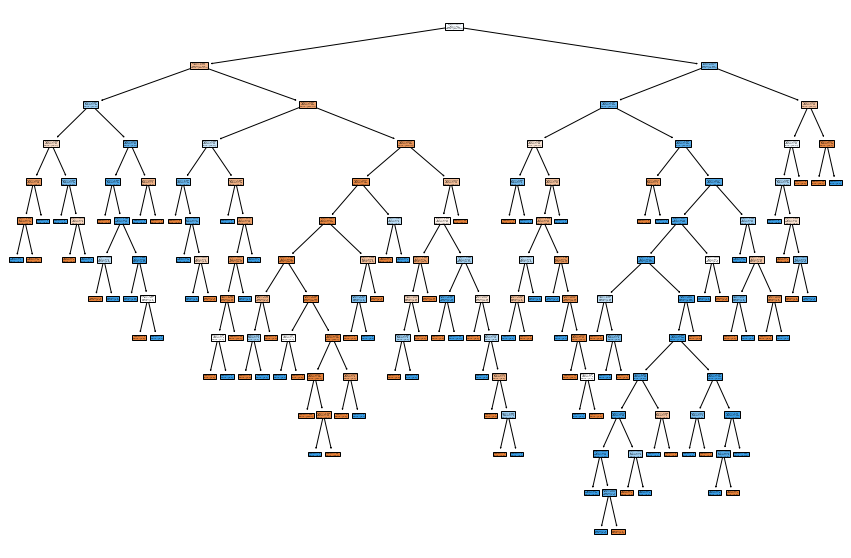

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [21]:
import sklearn
sklearn.__version__

'0.24.1'

In [27]:
path=dtc.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [28]:
ccp_alphas

array([0.        , 0.00132653, 0.00134454, 0.00139098, 0.00139942,
       0.00140162, 0.00140725, 0.00171429, 0.00181524, 0.00190476,
       0.00190476, 0.00214286, 0.00215561, 0.00217687, 0.00223456,
       0.0022465 , 0.00228571, 0.00244898, 0.00253589, 0.00253968,
       0.00263736, 0.00263886, 0.00267857, 0.00267857, 0.00290698,
       0.00304762, 0.0032967 , 0.00335317, 0.00342857, 0.00342857,
       0.00342857, 0.00349213, 0.00376115, 0.004     , 0.00408163,
       0.00417989, 0.00426712, 0.00428571, 0.00430839, 0.00435828,
       0.00446429, 0.00494072, 0.00499118, 0.00596915, 0.00631656,
       0.00670523, 0.00688317, 0.00783056, 0.0081543 , 0.00899887,
       0.00972488, 0.01063067, 0.01108523, 0.0167264 , 0.0206132 ,
       0.02371063, 0.04018752, 0.10218705])

In [30]:
dtcs=[]
for alpha in ccp_alphas:
    dtc=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    dtc.fit(x_train,y_train)
    dtcs.append(dtc)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dtcs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.10218705182556115


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

## Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

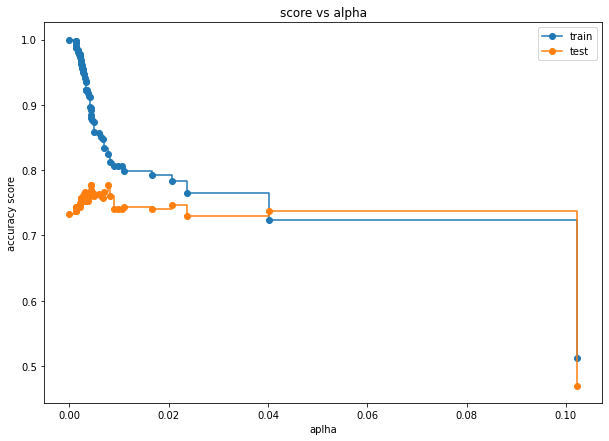

In [34]:
train_score=[dtc.score(x_train,y_train) for dtc in dtcs]
test_score=[dtc.score(x_test,y_test) for dtc in dtcs]
plt.figure(figsize=(10,7))
plt.xlabel('aplha')
plt.ylabel('accuracy score')
plt.title('score vs alpha')
plt.plot(ccp_alphas,train_score,marker='o', label="train",
        drawstyle="steps-post")
plt.plot(ccp_alphas,test_score,marker='o', label="test",
        drawstyle="steps-post")
plt.legend()

In [37]:
dtc=DecisionTreeClassifier(random_state=0,ccp_alpha=0.022)
dtc.fit(x_train,y_train)
pred_nm=dtc.predict(x_test)
accuracy_score(y_test,pred_nm)

0.7466666666666667

[Text(167.4, 181.2, 'X[2] <= 0.072\ngini = 0.5\nsamples = 700\nvalue = [341, 359]'),
 Text(83.7, 108.72, 'X[1] <= -0.654\ngini = 0.423\nsamples = 378\nvalue = [263, 115]'),
 Text(41.85, 36.23999999999998, 'gini = 0.442\nsamples = 82\nvalue = [27, 55]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.323\nsamples = 296\nvalue = [236, 60]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.823\ngini = 0.367\nsamples = 322\nvalue = [78, 244]'),
 Text(209.25, 36.23999999999998, 'gini = 0.294\nsamples = 279\nvalue = [50, 229]'),
 Text(292.95, 36.23999999999998, 'gini = 0.454\nsamples = 43\nvalue = [28, 15]')]

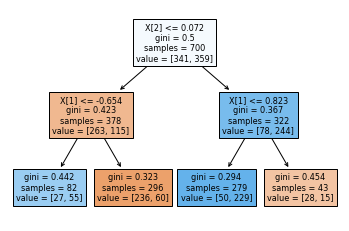

In [38]:
tree.plot_tree(dtc,filled=True)